<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis of Processed Data</h4>
    <p style="font-size: 20px;">NBA API Data (1983-2024)</p>
</div>

<a name="EDAp"></a>

# Table of Contents

[Setup](#Setup)

[Data](#Data)

**[1. Team Level Data](#1.-Team-Level-Data)**

- [1.1. Score Total](#1.1.-Score-Total)

- [1.2. Score Difference](#1.2.-Score-Difference)
  
**[2. Player Level Data](#2.-Player-Level-Data)**

# Setup

[Return to top](#EDAp)

In [3]:
# basic modules
import os
import time
import random as rn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style
plt.style.use('seaborn-v0_8-notebook')
sns.set_style('white')
#sns.set_style('darkgrid')

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# warnings
import warnings
warnings.filterwarnings("ignore")

# user defined functions
import utility_functions as utl

# Data

[Return to top](#EDAp)

In [4]:
team_matchups_df = pd.read_csv('../data/processed/br_team_matchups_2000_2024.csv')

# convert 'date' column to datetime
team_matchups_df['date'] = pd.to_datetime(team_matchups_df['date'])

In [5]:
team_matchups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30752 entries, 0 to 30751
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   season                                  30752 non-null  int64  
 1   date                                    30752 non-null  object 
 2   start_time                              30752 non-null  object 
 3   home_team                               30752 non-null  object 
 4   away_team                               30752 non-null  object 
 5   home_team_score                         30752 non-null  int64  
 6   away_team_score                         30752 non-null  int64  
 7   home_outcome                            10351 non-null  object 
 8   home_minutes_played                     10351 non-null  float64
 9   home_made_field_goals                   10351 non-null  float64
 10  home_attempted_field_goals              10351 non-null  fl

In [6]:
team_matchups_df.head()

season        date                 start_time             home_team  \
0    2000  1999-11-02  1999-11-02 05:00:00+00:00     Charlotte Hornets   
1    2000  1999-11-02  1999-11-02 05:00:00+00:00      Dallas Mavericks   
2    2000  1999-11-02  1999-11-02 05:00:00+00:00        Denver Nuggets   
3    2000  1999-11-02  1999-11-02 05:00:00+00:00       Houston Rockets   
4    2000  1999-11-02  1999-11-02 05:00:00+00:00  Los Angeles Clippers   

               away_team  home_team_score  away_team_score home_outcome  \
0          Orlando Magic              100               86          Win   
1  Golden State Warriors              108               96          Win   
2           Phoenix Suns              107              102          Win   
3        Milwaukee Bucks               93               98         Loss   
4    Seattle Supersonics               92              104         Loss   

   home_minutes_played  home_made_field_goals  home_attempted_field_goals  \
0                240.0                   34.0                        82.0   
1                240.0                   39.0                        85.0   
2                265.0                   40.0                        89.0   
3                240.0                   34.0                        75.0   
4                240.0                   35.0                        78.0   

   home_made_three_point_field_goals  home_attempted_three_point_field_goals  \
0                               10.0                                    22.0   
1                                2.0                                    15.0   
2                                8.0                                    18.0   
3                                6.0                                    20.0   
4                                6.0                                    16.0   

   home_made_free_throws  home_attempted_free_throws  home_offensive_rebounds  \
0                   22.0                        37.0                     14.0   
1                   28.0                        34.0                     11.0   
2                   19.0                        26.0                     13.0   
3                   19.0                        29.0                     15.0   
4                   16.0                        27.0                     12.0   

   home_defensive_rebounds  home_assists  home_steals  home_blocks  \
0                     33.0          25.0         13.0          5.0   
1                     30.0          22.0         11.0          6.0   
2                     42.0          25.0          6.0         16.0   
3                     27.0          22.0          5.0          7.0   
4                     33.0          14.0          4.0          9.0   

   home_turnovers  home_personal_fouls  home_points  away_assists  \
0            21.0                 25.0        100.0          17.0   
1            13.0                 19.0        108.0          14.0   
2            18.0                 17.0        107.0          29.0   
3            18.0                 24.0         93.0          20.0   
4            17.0                 24.0         92.0          25.0   

   away_attempted_field_goals  away_attempted_free_throws  \
0                        80.0                        27.0   
1                        82.0                        27.0   
2                       111.0                        14.0   
3                        79.0                        28.0   
4                        93.0                        32.0   

   away_attempted_three_point_field_goals  away_blocks  \
0                                     8.0          4.0   
1                                    18.0          2.0   
2                                    22.0          5.0   
3                                     7.0          2.0   
4                                    20.0          3.0   

   away_defensive_rebounds  away_made_field_goals  away_made_free_throws  \
0                     36.0                   34.

In [7]:
team_matchups_df.describe()

season  home_team_score  away_team_score  home_minutes_played  \
count  30752.000        30752.000        30752.000            10351.000   
mean    2011.483          102.942           99.994              241.823   
std        6.902           13.403           13.520                7.629   
min     2000.000           56.000           53.000              240.000   
25%     2006.000           94.000           91.000              240.000   
50%     2011.000          103.000           99.000              240.000   
75%     2017.000          112.000          109.000              240.000   
max     2023.000          175.000          176.000              340.000   

       home_made_field_goals  home_attempted_field_goals  \
count              10351.000                   10351.000   
mean                  37.507                      82.879   
std                    5.524                       8.092   
min                   19.000                      57.000   
25%                   34.000                      77.000   
50%                   37.000                      83.000   
75%                   41.000                      88.000   
max                   65.000                     123.000   

       home_made_three_point_field_goals  \
count                          10351.000   
mean                               7.654   
std                                4.190   
min                                0.000   
25%                                5.000   
50%                                7.000   
75%                               10.000   
max                               27.000   

       home_attempted_three_point_field_goals  home_made_free_throws  \
count                               10351.000              10351.000   
mean                                   21.520                 18.368   
std                                     9.614                  6.299   
min                                     1.000                  1.000   
25%                                    14.000                 14.000   
50%                                    20.000                 18.000   
75%                                    28.000                 22.000   
max                                    61.000                 50.000   

       home_attempted_free_throws  home_offensive_rebounds  \
count                   10351.000                10351.000   
mean                       24.122                   11.071   
std                         7.786                    4.041   
min                         1.000                    0.000   
25%                        19.000                    8.000   
50%                        24.000                   11.000   
75%                        29.000                   14.000   
max                        64.000                   33.000   

       home_defensive_rebounds  home_assists  home_steals  home_blocks  \
count                10351.000     10351.000    10351.000    10351.000   
mean                    31.740        22.249        7.483        4.915   
std                      5.444         5.302        2.891        2.589   
min                     14.000         5.000        0.000        0.000   
25%                     28.000        19.000        5.000        3.000   
50%                     32.000        22.000        7.000        5.000   
75%                     35.000        26.000        9.000        6.000   
max                     60.000        50.000       22.000       20.000   

       home_turnovers  home_personal_fouls  home_points  away_assists  \
count       10351.000            10351.000    10351.000     13186.000   
mean           13.695               21.105      101.037        21.638   
std             3.925                4.549       13.581         5.150   
min             1.000                7.000       56.000         3.000   
25%            11.000               18.000       91.000        18.000   
50%            14.000               21.000      101.000        21.000   
75%       

<a name="1.-Team-Level-Data"></a>
# 1. Team Level Data

[Return to top](#EDAp)

<a name="1.1.-Score-Total"></a>
## 1.1. Score Total

[Return to top](#EDAp)

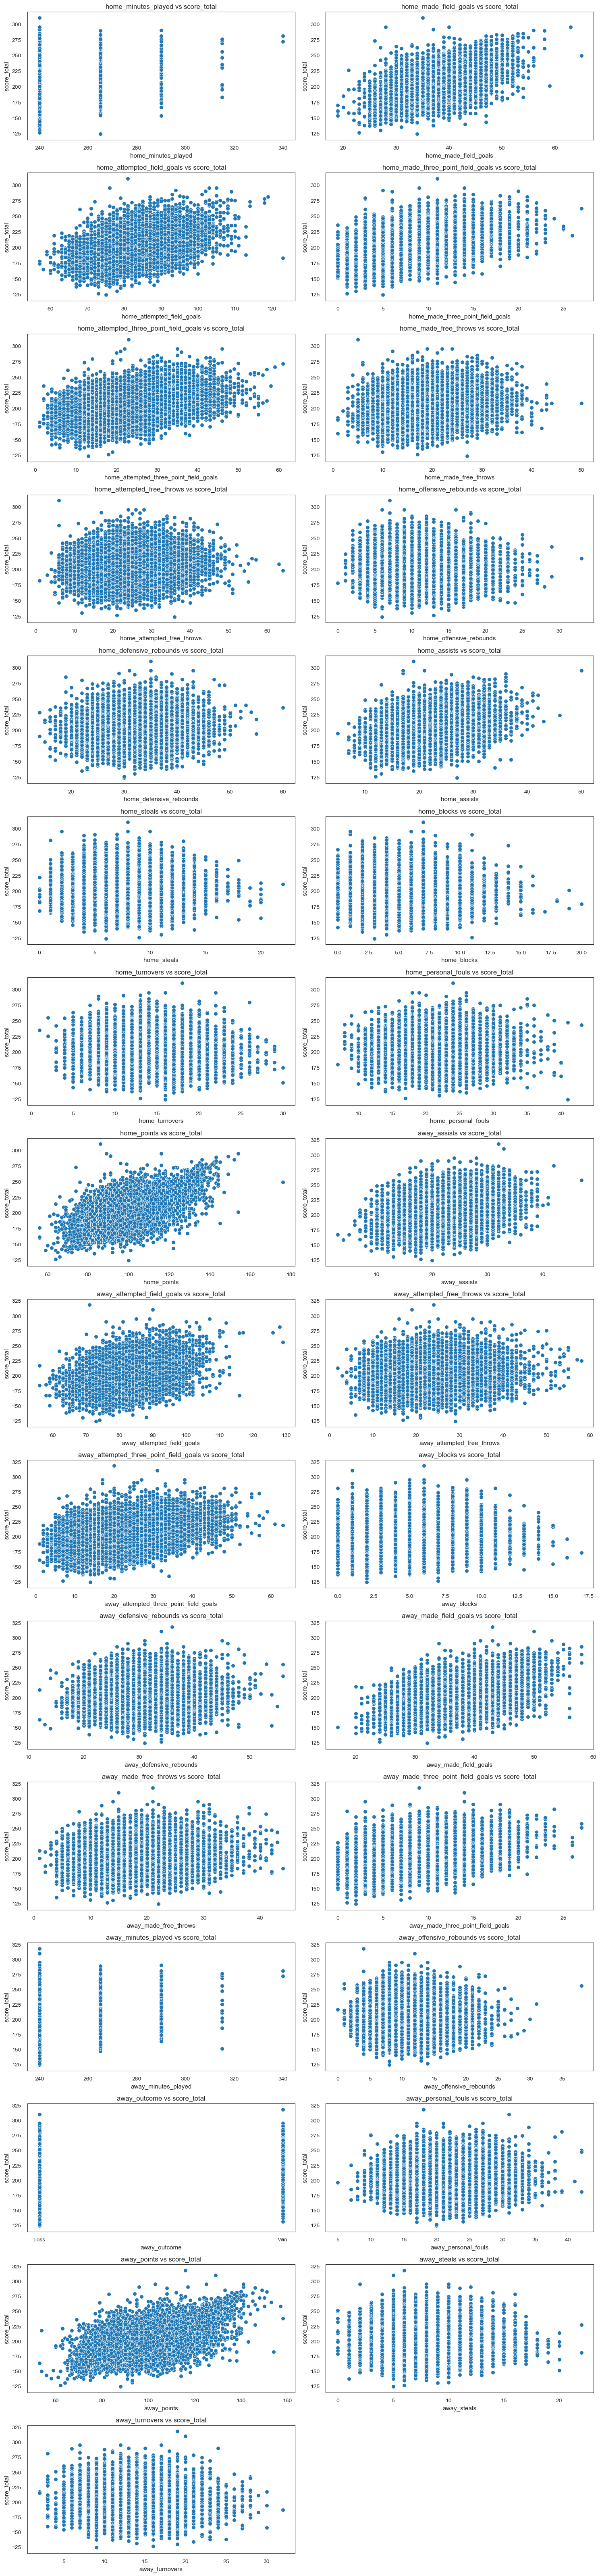

In [11]:
# scatterplots of target against all other variables
target = 'score_total'

# columns not to be plotted
omit_cols = [
  'season', 'date', 'start_time', 'home_team', 'away_team', 'home_team_score', 
  'away_team_score', 'home_outcome', 'away_outcome', 'score_diff'
]

# filter out columns to omit and the target column
plot_cols = [col for col in team_matchups_df.columns if col not in omit_cols and col != target]

# setup subplots
n_cols = len(plot_cols)
n_rows = (n_cols + 1) // 2  
fig, axs = plt.subplots(n_rows, 2, figsize=(15, 4 * n_rows))  
axs = axs.ravel()

# loop through each column and create scatter plots
for i, col in enumerate(plot_cols):
    sns.scatterplot(x=team_matchups_df[col], y=team_matchups_df[target], ax=axs[i])
    axs[i].set_title(f'{col} vs {target}')

# hide any unused axes
for i in range(n_cols, len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()

<a name="1.2.-Score-Difference"></a>
## 1.2. Score Difference

[Return to top](#EDAp)

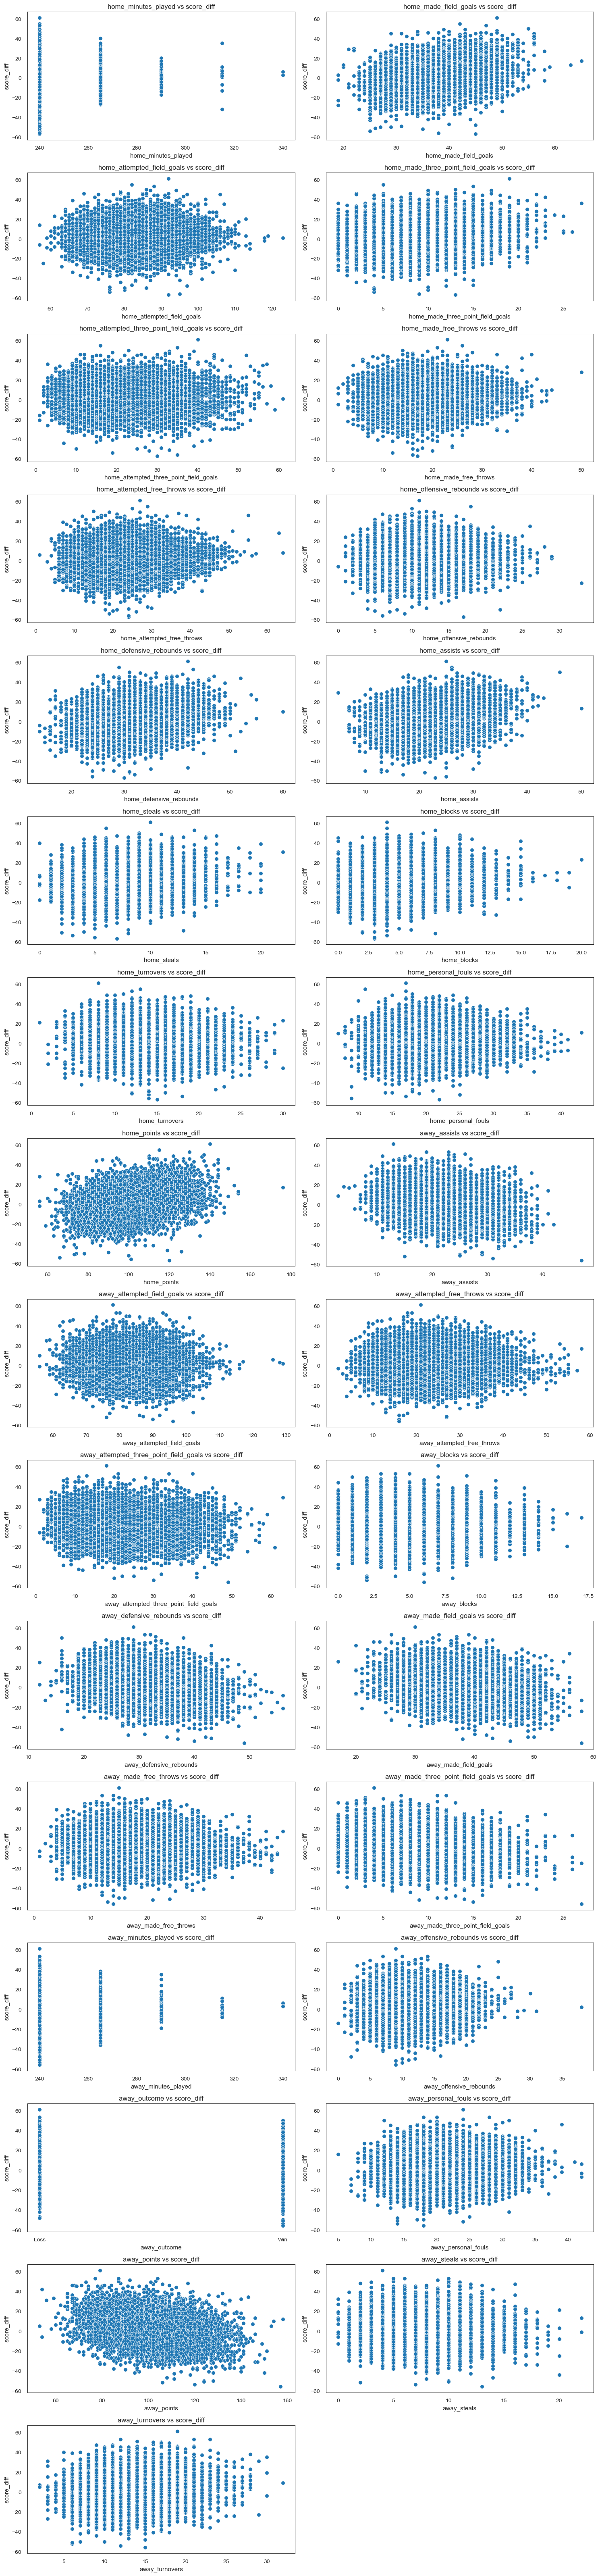

In [12]:
# scatterplots of target against all other variables
target = 'score_diff'

# columns not to be plotted
omit_cols = [
  'season', 'date', 'start_time', 'home_team', 'away_team', 'home_team_score', 
  'away_team_score', 'home_outcome', 'away_outcome', 'score_diff'
]

# filter out columns to omit and the target column
plot_cols = [col for col in team_matchups_df.columns if col not in omit_cols and col != target]

# setup subplots
n_cols = len(plot_cols)
n_rows = (n_cols + 1) // 2  
fig, axs = plt.subplots(n_rows, 2, figsize=(15, 4 * n_rows))  
axs = axs.ravel()

# loop through each column and create scatter plots
for i, col in enumerate(plot_cols):
    sns.scatterplot(x=team_matchups_df[col], y=team_matchups_df[target], ax=axs[i])
    axs[i].set_title(f'{col} vs {target}')

# hide any unused axes
for i in range(n_cols, len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()

<a name="2.-Player-Level-Data"></a>
# 2. Player Level Data

[Return to top](#EDAp)